<a href="https://colab.research.google.com/github/Starboy177/DataScience/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, because it is based on two models.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model gets distracted by unneccesary variables or information, so we should select a model with the least variables to avoid overfitting.

**Task3**:

How do we mitigate overfitting?

Using simpler priors helps mitigate overfitting, as well as using the least amount of variables.

**Task4**:

How do we mitigate underfitting?

By selecting a model based on elpd_loo.

**Task5**:

Why would we want more than one predictor in a model?

Having more than one predictor improves the accuracy of the model.

**Task6**:

Can we have too many predictors? How would we now?

Yes, too many predictors could cause an overfitting model. If the output isn't actually possible for what you are predicting but it matches the predictor data, you probably have too many predictors.

**Task7**:

What is variable selection, and how does it work?

It is the process of selecting which variables to use as predictors. You should try and find the least amount that can still give you accurate outputs, to minimize overfitting.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The standard model would output the same slope, but different intercepts for each category. The slopes are different in the hierarchal model, and the third model shows how the non-categorical variable interacts witht each category.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

There are too many predictors to visualize the entire model at once. You would have to create plots for each variable while holding the rest constant, to see how each one relates to the outcome.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.3 MB/s eta 0:00:00


In [2]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [4]:
ft_c = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [5]:
ft_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 49 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
ft_ft = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [7]:
ft_3pt = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_3pt_interact = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

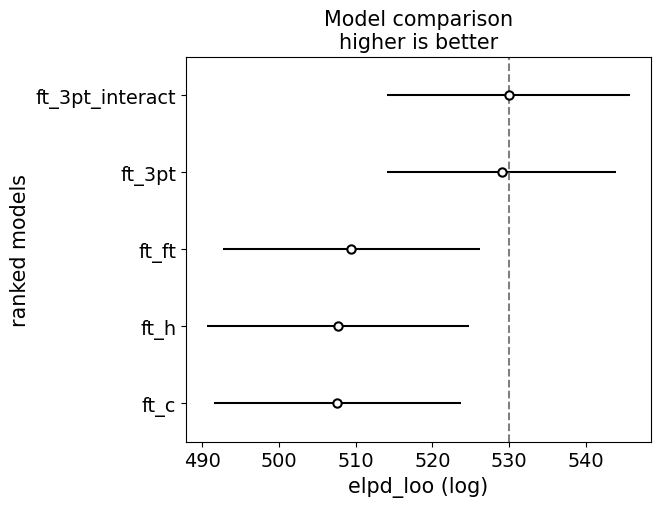

In [10]:
compare = az.compare({"ft_c":ft_c, "ft_h":ft_h, "ft_ft":ft_ft, "ft_3pt":ft_3pt, "ft_3pt_interact":ft_3pt_interact})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The one which compares 3pt attempts with position is the most accurate. I think this is because 3pt shots are better at predicting how good a player is than free throws. The other 3pt model probably isn't as good because the extra predictors might be causing overfitting.